In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import tree

from preprocessing import *

plt.rcParams["figure.dpi"] = 60

# Carga del dataset

In [2]:
from collections import Counter
import requests

with requests.get(
    "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv") as r, open("features.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

with requests.get(
    "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv") as r, open("target.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [5]:
df_features = pd.read_csv("features.csv")
df_target = pd.read_csv("target.csv")
df = df_features.merge(df_target, left_on='id', right_on='id')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Selección de modelos

Buscamos la mejor combinación de los hiperparámetros max_depth, min_samples_leaf y criterion, con 4 datasets distintos, utilizando Randomized Search.

In [7]:
X_train1, X_test1, y_train1, y_test1 = preprocessing_arboles_1(df)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf1 = tree.DecisionTreeClassifier(random_state=117)

rgscv1 = RandomizedSearchCV(
    clf1, params, n_iter = 120, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train1, y_train1)

print(f"Best score: {rgscv1.best_score_}")
print(f"Best params {rgscv1.best_params_}")

Best score: 0.8583627148769502
Best params {'min_samples_leaf': 111, 'max_depth': 13, 'criterion': 'entropy'}


In [8]:
X_train2, X_test2, y_train2, y_test2 = preprocessing_arboles_2(df)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf2 = tree.DecisionTreeClassifier(random_state=117)

rgscv2 = RandomizedSearchCV(
    clf2, params, n_iter = 120, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train2, y_train2)

print(f"Best score: {rgscv2.best_score_}")
print(f"Best params {rgscv2.best_params_}")

Best score: 0.8582474401536192
Best params {'min_samples_leaf': 109, 'max_depth': 11, 'criterion': 'entropy'}


In [9]:
X_train3, X_test3, y_train3, y_test3 = preprocessing_arboles_3(df)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf3 = tree.DecisionTreeClassifier(random_state=117)

rgscv3 = RandomizedSearchCV(
    clf3, params, n_iter = 120, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train3, y_train3)

print(f"Best score: {rgscv3.best_score_}")
print(f"Best params {rgscv3.best_params_}")

Best score: 0.8514964743212323
Best params {'min_samples_leaf': 168, 'max_depth': 14, 'criterion': 'entropy'}


In [10]:
X_train4, X_test4, y_train4, y_test4 = preprocessing_arboles_4(df)
params = {
    'max_depth': np.arange(1, 15),
    'min_samples_leaf': np.arange(1, 300),
    "criterion": ["gini", "entropy"],
}

clf4 = tree.DecisionTreeClassifier(random_state=117)

rgscv4 = RandomizedSearchCV(
    clf4, params, n_iter = 120, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train4, y_train4)

print(f"Best score: {rgscv4.best_score_}")
print(f"Best params {rgscv4.best_params_}")

Best score: 0.8500570708766741
Best params {'min_samples_leaf': 156, 'max_depth': 12, 'criterion': 'entropy'}


# Evaluación del modelo final

El mejor modelo encontrado corresponde al preprocesamiento preprocessing_arboles_1 , con 'min_samples_leaf': 111, 'max_depth': 13, 'criterion': 'entropy'.
Entrenamos el modelo y evaluamos utilizando el set de holdout.

In [11]:
X_train, X_test, y_train, y_test = preprocessing_arboles_1(df)

clf = tree.DecisionTreeClassifier(random_state=117, max_depth=13, min_samples_leaf=111, criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [14]:
print(f"Auc Roc: {roc_auc_score(y_test, y_pred_proba)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Auc Roc: 0.860304668330099
Accuracy: 0.8453858607663248
Precision: 0.7218863361547763
Recall: 0.4867509172441908
F1 Score: 0.5814463111760408


## Matriz de confusión

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


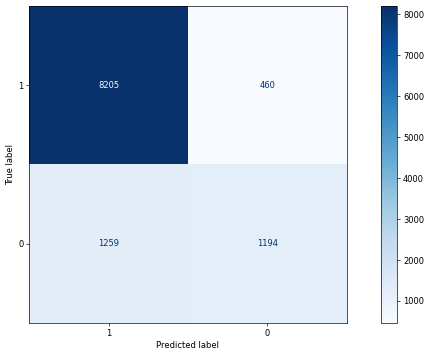

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax
)
plt.show()

## Curva ROC

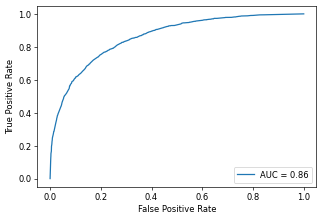

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [21]:
sorted(list(zip(X_train.columns, clf.feature_importances_)), key=lambda x: -x[1])

[('humedad_tarde', 0.5816577407837429),
 ('rafaga_viento_max_velocidad', 0.11114572208476586),
 ('horas_de_sol', 0.07406590305101345),
 ('presion_atmosferica_tarde', 0.06673624922755719),
 ('mm_lluvia_dia', 0.0387878056368155),
 ('presion_atmosferica_temprano', 0.03255070975806613),
 ('nubosidad_tarde', 0.013638074835666984),
 ('humedad_temprano', 0.010200646942594179),
 ('temperatura_temprano', 0.00914109617929661),
 ('temp_min', 0.008906789981462932),
 ('temp_max', 0.0068903231819379485),
 ('temperatura_tarde', 0.0066454074094708625),
 ('direccion_viento_tarde_Nornoreste', 0.005968671346506016),
 ('velocidad_viendo_tarde', 0.005534561226122337),
 ('velocidad_viendo_temprano', 0.004972171238194542),
 ('mm_evaporados_agua', 0.003782532839196867),
 ('direccion_viento_tarde_Norte', 0.003120597852087938),
 ('mes', 0.0027674898106405193),
 ('barrio_Villa Urquiza', 0.001771070027653734),
 ('direccion_viento_temprano_Nornoreste', 0.0015130390314805093),
 ('direccion_viento_tarde_Noreste', 0.

# Predicciones finales

In [6]:
X_train, X_test, y_train, y_test = preprocessing_arboles_1(df)

clf = tree.DecisionTreeClassifier(random_state=117, max_depth=13, min_samples_leaf=111, criterion='entropy')
clf.fit(X_train, y_train)

with requests.get(
    "https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8/export?format=csv") as r, open("pred.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

df_pred = pd.read_csv("pred.csv")

df_pred_preprocess = preprocessing_arboles_pred(df_pred)
y_pred_final = clf.predict(df_pred_preprocess)
df_pred_final = pd.DataFrame({'id': df_pred['id'], 'llovieron_hamburguesas_al_dia_siguiente': y_pred_final})
df_pred_final.loc[df_pred_final['llovieron_hamburguesas_al_dia_siguiente'] == 1, 'llovieron_hamburguesas_al_dia_siguiente'] = 'si'
df_pred_final.loc[df_pred_final['llovieron_hamburguesas_al_dia_siguiente'] == 0, 'llovieron_hamburguesas_al_dia_siguiente'] = 'no'

df_pred_final

,id,llovieron_hamburguesas_al_dia_siguiente
0,116706,no
1,58831,no
2,31981,no
3,2533,no
4,7270,si
...,...,...
29087,73456,no
29088,14471,no
29089,106482,no
29090,21057,no


In [7]:
df_pred_final.to_csv('predicciones/arbol_de_decision.csv', index=False)